In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
invoice = pd.read_csv('fct_invoice.csv')
customers = pd.read_json('dim_customer.json')
invoice = invoice.sort_values(['customer_id'])
customers = customers.sort_values(['id'])
invoice['Sales'] = invoice['quantity']*invoice['price']

# Easy

### 1. How many unique customers are in the dataset?

In [5]:
unique_users = set((customers['id']))

len(unique_users)

5191

### 2. What are the different categories of products available? How many unique categories are there?

In [6]:
categories = set(invoice['category'])

categories

{'Books',
 'Clothing',
 'Cosmetics',
 'Food & Beverage',
 'Shoes',
 'Souvenir',
 'Technology',
 'Toys'}

In [21]:
len(categories)

8

### 3. Which payment method is the most popular? How many times was it used?

In [31]:
Debit = 0
Credit = 0
Cash = 0
error = 0
for method in invoice['payment_method']:
    if method == 'Debit Card':
        Debit += 1
    elif method == 'Credit Card':
        Credit += 1
    elif method == 'Cash':
        Cash += 1
    else:
        error += 1
print('Debit Card:',Debit)
print('Credit Card:',Credit)
print('Cash:',Cash)

Debit Card: 20079
Credit Card: 34931
Cash: 44447


The most popular payment method is Cash with it being used 44447 times

# Medium

### 1. What are the three most popular categories, by total sales?

In [31]:
category_sales = invoice.groupby('category')['Sales'].sum()
category_sales.sort_values(ascending = False)
category_sales.nlargest(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: Sales, dtype: float64

###  2. What are the total sales attributed to customers over the age of 45?

In [18]:
mergs = invoice.merge(customers, how='inner', left_on= 'customer_id',right_on = 'id')
df = mergs.loc[(mergs['age'] > 45)]
df['Sales'].sum()

82039768.15

### 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)


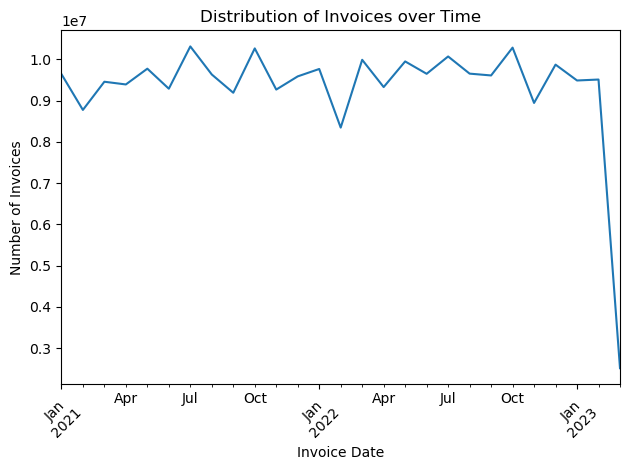

In [28]:
invoice['invoice_date'] = pd.to_datetime(invoice['invoice_date'], dayfirst=True)

date_counts = invoice.groupby(invoice['invoice_date'].dt.to_period('M'))['Sales'].sum()
date_counts.plot(kind='line')
plt.xlabel('Invoice Date')
plt.ylabel('Number of Invoices')
plt.title('Distribution of Invoices over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hard

### 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth

In [9]:
age_range = []
for v in customers['age']:
    if v >= 10 and v < 20:
        age_range.append('10-19')
    elif v >= 21 and v < 30:
        age_range.append('20-29')
    elif v >= 31 and v < 40:
        age_range.append('30-39')
    elif v >= 41 and v < 50:
        age_range.append('40-49')
    elif v >= 51 and v < 60:
        age_range.append('50-69')
    elif v >= 61 and v < 70:
        age_range.append('60-69')
    elif v >= 71 and v < 80:
        age_range.append('70-89')
    elif v >= 81 and v < 90:
        age_range.append('20-29')
    elif v >= 91 and v < 100:
        age_range.append('90-99')
    else:
        age_range.append('NaN')

customers['age range'] = age_range

#if id is == to customer id then check the age and add a column for the age range 

In [12]:
merged = invoice.merge(customers, how='inner', left_on='customer_id',right_on = 'id')

In [17]:
pd.pivot_table(merged, values='Sales', index= 'category', columns = ['age range'], aggfunc=np.sum)

age range,10-19,20-29,30-39,40-49,50-69,60-69,70-89,NaN
category,,,,,,,,
Books,12801.75,93475.50,76386.30,79143.60,71159.55,72098.85,50691.90,378795.45
Clothing,1927413.84,12889036.16,10423278.80,10122298.56,9511035.60,9351993.20,7117297.44,52654437.44
Cosmetics,109619.36,752210.00,666336.08,608964.82,540005.46,568630.10,387977.72,3159119.36
Food & Beverage,13582.31,91974.78,79616.29,79982.39,67372.86,70662.53,49585.63,396758.26
Shoes,993281.35,7676174.30,6598869.15,6445825.80,5523364.51,5234082.57,4214993.91,29866859.88
Souvenir,12375.15,67424.04,57711.60,60397.77,50333.43,47764.56,34955.40,304862.70
Technology,1129800.00,6067950.00,5728800.00,5451600.00,4046700.00,4856250.00,3276000.00,27305250.00
Toys,60426.24,473589.76,387824.64,352271.36,318474.24,325427.20,258012.16,1804400.64
